# 4-6 ヒストグラム
縦軸に度数（値の出現頻度）、横軸に階級（値の上限値〜下限値の幅）を取ったグラフ   
データの分布の形状を視覚的に認識するために用いる

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib notebook
%matplotlib inline

##  ヒストグラムを作成する

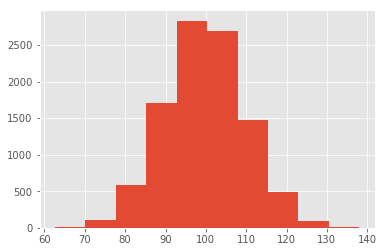

In [4]:
# 平均値100、標準偏差10の正規分布に従う1万個のデータを作成
mu = 100     # 平均値
sigma  = 10  # 標準偏差
np.random.seed(0)

x = np.random.normal(mu, sigma, 10000)

# ヒストグラムの描画
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x)

plt.show()

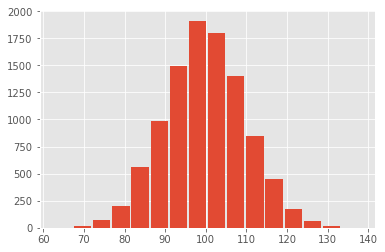

In [5]:
'''
rwidthでビンの幅を、binsでビンの本数を指定
'''

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(x, rwidth=0.9, bins=16)

plt.show()

## ヒストグラムを活用する

In [10]:
import os
import pandas as pd
base_url = '../../practical-jupyter/anime/'
anime_master_csv = os.path.join(base_url, 'anime_master.csv')
df = pd.read_csv(anime_master_csv)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


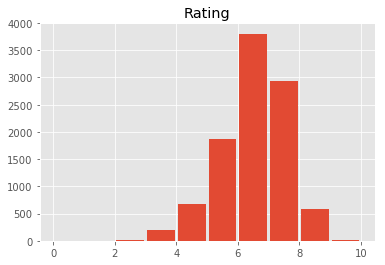

In [12]:
'''
レーティングの分布の可視化
'''

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], range=(0, 10), rwidth=0.9)
ax.set_title('Rating')

plt.show()

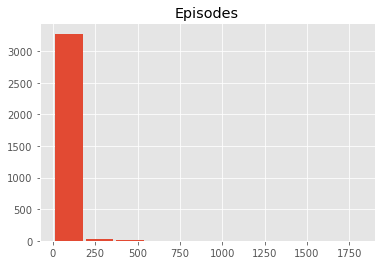

In [13]:
'''
エピソード数の分布の可視化
rangeを指定してないため、データの状況が見づらい
'''

fig = plt.figure()
ax = fig.add_subplot(111)

df_tv = df[df['type'] == 'TV']

ax.hist(df_tv['episodes'], rwidth=0.9)
ax.set_title('Episodes')

plt.show()

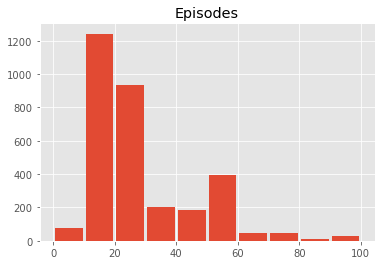

In [14]:
'''
rangeを指定した場合
'''

fig = plt.figure()
ax = fig.add_subplot(111)

df_tv = df[df['type'] == 'TV']

ax.hist(df_tv['episodes'], rwidth=0.9, range=(0, 100))
ax.set_title('Episodes')

plt.show()

## さまざまなヒストグラムを作成する

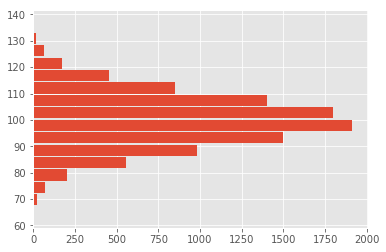

In [15]:
'''
横向きのヒストグラム
'''

np.random.seed(0)
x = np.random.normal(100, 10, 10000)

fig = plt.figure()
ax = fig.add_subplot(111)

# orientationをhorizontalに指定
ax.hist(x, rwidth=0.9, bins=16, orientation='horizontal')

plt.show()

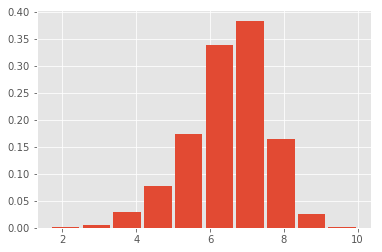

In [16]:
'''
相対度数のヒストグラム
データ数が異なるグループのヒストグラムを比較する場合に比較が容易
'''

fig = plt.figure()
ax = fig.add_subplot(111)

# normed を True に指定
ax.hist(df['rating'], normed=True, rwidth=0.9)

plt.show()

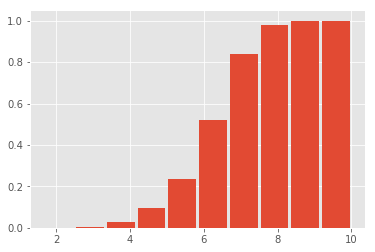

In [18]:
'''
累積ヒストグラム（累積度数図）
'''

fig = plt.figure()
ax = fig.add_subplot(111)

# cumulative を True に指定
ax.hist(df['rating'], normed=True, cumulative=True, rwidth=0.9)

plt.show()

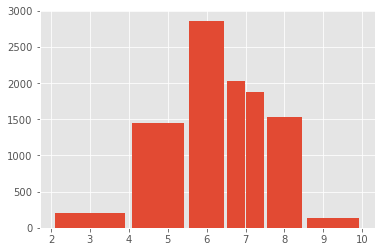

In [19]:
'''
階級幅の設定
binsオプションにリスト型の数列を与えることで階級幅を指定
'''

fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(df['rating'], bins=[2, 4, 5.5, 6.5, 7, 7.5, 8.5, 10], rwidth=0.9)

plt.show()

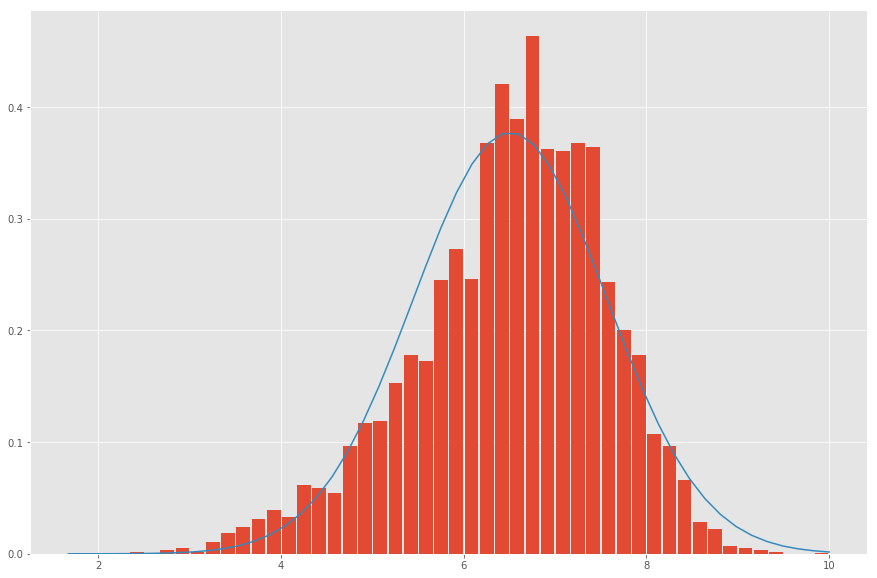

In [23]:
'''
近似曲線の追加
'''

bins = 50
dfmin = np.min(df['rating'])
dfmax = np.max(df['rating'])

# ヒストグラムの描画
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.hist(df['rating'], bins=bins, range=(dfmin, dfmax), normed=True, rwidth=0.9)

# 平均と標準偏差
mu, sigma = df['rating'].mean(), df['rating'].std()
# X値
x = np.linspace(dfmin, dfmax, bins) # ビンの区切りの値
# 近似的な確率密度関数を使用してY値を生成
y = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
# 近似曲線の描画
ax.plot(x, y)

plt.show()

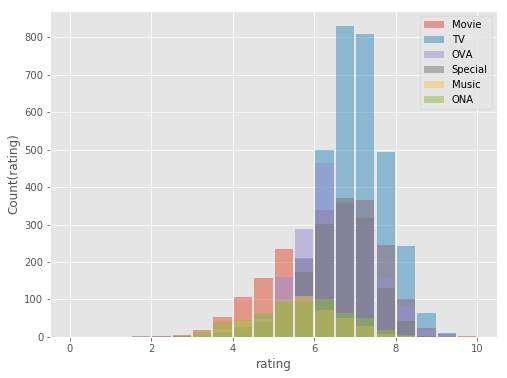

In [25]:
'''
複数グループを重ねて描画
'''

types = df['type'].unique()
labels = types.tolist()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

b_num = np.arange(0, 10.5, 0.5)

for t in types:
    ax.hist(df.loc[df['type'] == t, 'rating'],
           bins=b_num,
           rwidth=0.9,
           alpha=0.5,
           label=t)
    
ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()

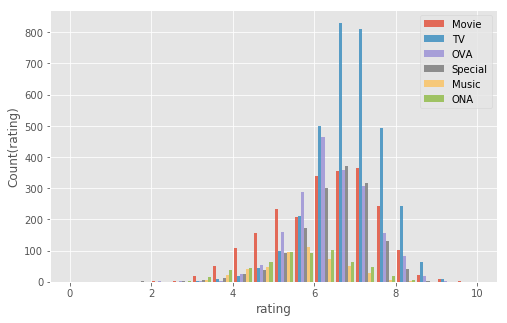

In [26]:
'''
複数グループを並べて描画
'''

# データセットの作成
dataset = [df.loc[df['type'] == t, 'rating'] for t in types]

fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)

ax.hist(dataset,
           bins=np.arange(0, 10.5, 0.5),
           rwidth=0.9,
           alpha=0.8,
           label=labels)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()

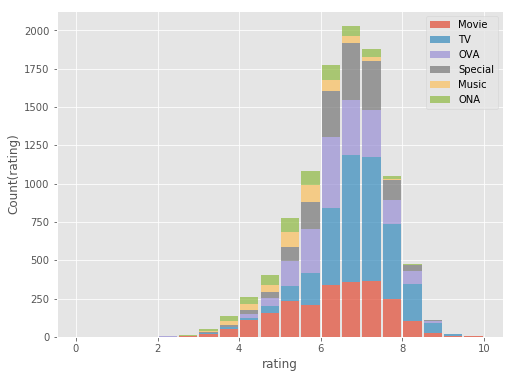

In [27]:
'''
複数グループを積み上げて描画
'''

# dataset, labelsは「並べて描画」で作成したものを使用
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

ax.hist(dataset,
           bins=np.arange(0, 10.5, 0.5),
           rwidth=0.9,
           alpha=0.7,
           label=labels,
           stacked=True)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()